# TRAKYA ÜNİVERSİTESİ BİLGİSAYAR MÜHENDİSLİĞİ BÖLÜM, ÖĞRENCİ VE MEZUN VERİLERİ ANALİZİ
    
* **Bu Raporda Trakya Üniversitesi Bilgisayar Mühendisliği bölümü için toplanan çeşitli veriler analiz edilip,**
    * **bölümü tercih etmeyi düşünen kişilere,**
    * **bölümün halihazırdaki öğrencilerine,**
    * **bölümden mezun olup ya da bölümle ilgili araştırmaları merak edenlere,**
    * **hitap edip rehberlik etmesine yönelik hazırlanmıştır.**


Konu Başlıkları Halinde Kullanılan Veri Setleri ve Alt Başlıklar:

1. [**DEMOGRAFİ**](#1)
    * Fakültedeki öğrenciler arasında bilgisayar mühendisliği öğrencisi oranı nedir?
    * Şehirdeki üniversite öğrencileri arasında bilgisayar mühendisliği öğrencisi oranı nedir? 
    * Bölümün kız erkek oranı nasıl? 
    * Bölüme gelen öğrenciler genellikle hangi şehirlerden geliyor?
    * Bölüme gelen öğrenciler genellikle hangi coğrafi bölgelerden geliyor?
1. [**DERSLER**](#2)
    * Hangi akademisyenler derslerden kolay kolay geçirmiyor?
    * Derslerin katsayıları(AKTS) ile başarısız öğrenci sayısı arasında bir bağlantı var mı?
    * Öğrenciler en çok hangi derslerden kolay kolay geçemiyor, takılıyor?
    * Sınıf, yıl ve derslerden başarısız olma sayıları arasında doğru/ters orantı(korelasyon) var mı?
    * Güz ve bahar yıllarında derslerden kalan öğrenci sayısı kıyaslaması yapılabilir mi?
1. [**NOT ORTALAMASI BAŞARILARI(%10)**](#3)
    * Öğrencinin bölüme giriş sırasının(numarasının son 2 hanesi) yüksek ortalama yapmasıyla bir bağlantısı var mı?
    * sınıfın ilk %10'luk başarı diliminde kızlar mı erkekler mi daha çok yer alıyor?
    * sınıfın ilk %10'luk başarı dilimine güz döneminde ve bahar döneminde cinsiyete göre dağılımda değişiklik oluyor mu?
    * Bölümün en başarılı öğrencileri kimler?
    * Bölümde şimdiye kadar en yüksek yapılan ortalamaları görebilir miyiz?
    * %10'luk başarı listesinde en sık rastlanan isim çeşitleri neler?
1. [**AKADEMİSYENLER**](#4)
    * Bölümün akademisyenlerinin yayınladığı yayın ve makaleler vb. konular açısından kıyaslamalarını öğrenebilir miyiz?
    * Yaptığımız akademisyen kıyaslamalarının değişkenleri arasındaki korelasyonu görebilir miyiz?
1. [**BÖLÜMÜN PUANI**](#5)
    * Bölümün Türkiye'de devlet üniversitelerindeki bilgisayar mühendislikleri arasındaki yeri neresidir?
    * Bölümün kendi üniversitesindeki sayısal bölümler arasındaki yeri neresidir?
1. [**300 ADET BÖLÜM ETİKETİNE SAHİP İŞ BULMA SİTESİNDEN KİŞİ**](#6)
    * Profillerine bu bölümü eklemiş kişilerin açıklamalarında en sık rastlanan kelimeler neler?
    * bu bölümden mezun olmuş kişiler en çok hangi kurumlarda çalışıyor?
    * Bu bölümden mezun olmuş kişiler en sık hangi konumlarda çalışıyor?
1. [**SON**](#7)
    * Veri Kaynakları
    * Hazırlayan
    


## KUTUPHANELER

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import os
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from mpl_toolkits.mplot3d import Axes3D
import missingno as msno

#seaborn büyütmeyle ilgili
sns.reset_orig()


<a id="1"></a> <br>
# DEMOGRAFI

In [55]:
df_cins=pd.read_csv('cinsiyet.csv')
df_cins2=df_cins
df_cins2['Toplam']=df_cins2['2020']+df_cins2['2019']+df_cins2['2018']+df_cins2['2017']+df_cins2['2016']
df_cins2=df_cins2.sort_values(by=['Toplam'],ascending=False)
df_cins2=df_cins.set_index('Unnamed: 0')
df_cins2[:]

2020    2019    2018    2017    2016  Toplam
Unnamed: 0                                                           
Kiz-pc                     23      22      30      22      21     118
Erkek-pc                   75      71      58      66      67     337
toplam_kiz-pc             144     152     152     151     144     743
toplam_erkek-pc           518     510     510     457     435    2430
Toplam-pc                 662     662     662     608     579    3173
mezun_sayisi-pc            91     109      87      82      97     466
mezun_erkek-pc             56      71      61      58      59     305
mezun_kiz-pc               35      38      26      24      38     161
fakulte_toplam           3075    3082    2843    2606    2386   13992
okul_toplam(merkez)     39150   38697   41198   40864   38561  198470
Şehir toplam (merkez)  180901  185408  180327  178910  173037  898583

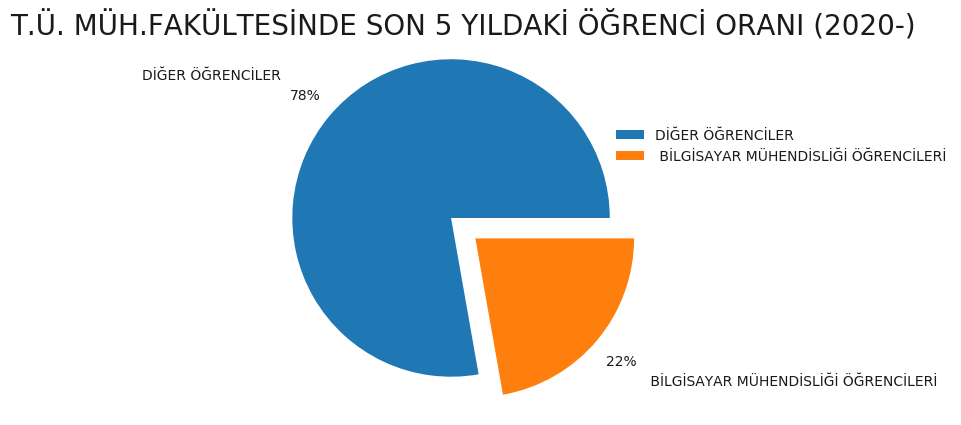

In [56]:
j,k=df_cins2.iloc[8,5],df_cins2.iloc[4,5]
j=j-k
a,b=(k*100)/(j+k),(j*100)/(j+k)
a=int(a)
b=int(b)

fig, ax = plt.subplots()
labels = ['DİĞER ÖĞRENCİLER', 
         ' BİLGİSAYAR MÜHENDİSLİĞİ ÖĞRENCİLERİ']
percentages = [b,a]
explode=(0.2,0)
ax.pie(percentages, explode=explode, labels=labels
       , autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("T.Ü. MÜH.FAKÜLTESİNDE SON 5 YILDAKİ ÖĞRENCİ ORANI (2020-)",fontsize=20)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8));

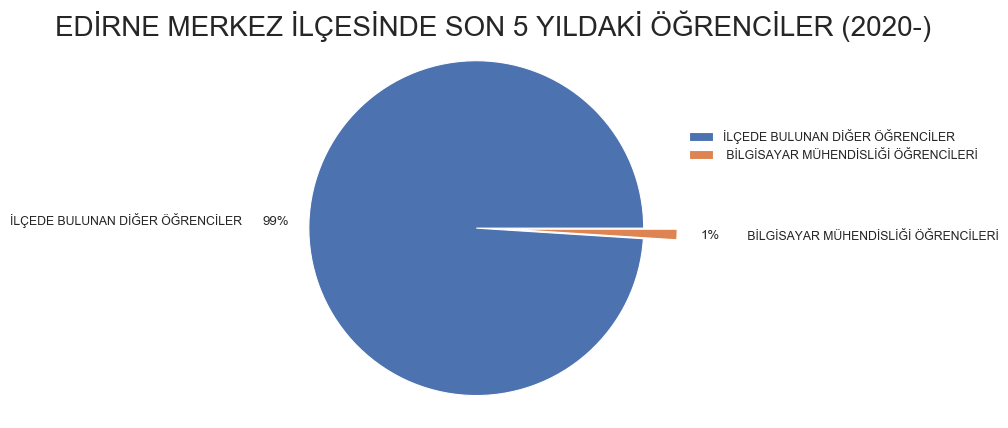

In [90]:
j,k=df_cins2.iloc[9,5],df_cins2.iloc[4,5]
j=j-k
a,b=(k*100)/(j+k),(j*100)/(j+k)
a=int(a)
b=int(b)

fig, ax = plt.subplots()
labels = ['İLÇEDE BULUNAN DİĞER ÖĞRENCİLER', 
         ' BİLGİSAYAR MÜHENDİSLİĞİ ÖĞRENCİLERİ']
percentages = [b,a]
explode=(0.2,0)
ax.pie(percentages, explode=explode, labels=labels
       , autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("EDİRNE MERKEZ İLÇESİNDE SON 5 YILDAKİ ÖĞRENCİLER (2020-)",fontsize=20)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8));

#EDİRNE MERKEZ İLÇESİNDE 100 ÖĞRENCİDEN 1'İ BİLGİSAYAR MÜHENDİSİ

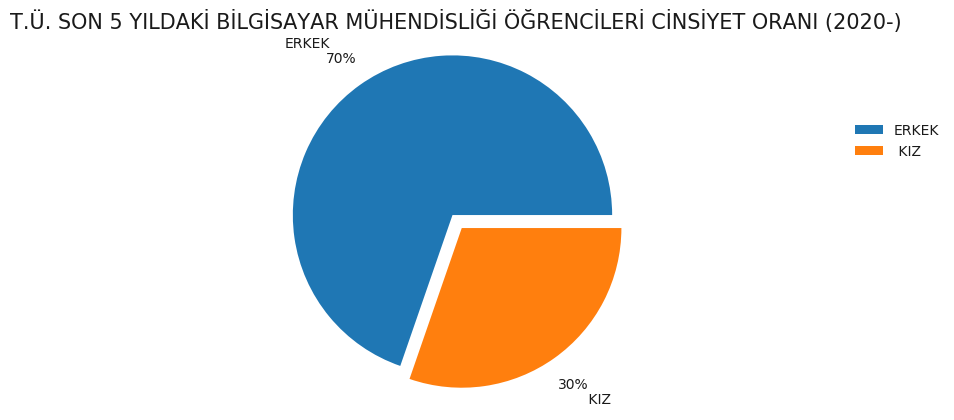

In [58]:
j,k=df_cins2.iloc[3,5],df_cins2.iloc[2,5]
j=j-k
a,b=(k*100)/(j+k),(j*100)/(j+k)
a=int(a)
b=int(b)

fig, ax = plt.subplots()
#plt.rcParams['font.size']=15
labels = ['ERKEK', 
         ' KIZ']
percentages = [b,a]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels
       , autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.32)
ax.axis('equal')
ax.set_title("T.Ü. SON 5 YILDAKİ BİLGİSAYAR MÜHENDİSLİĞİ ÖĞRENCİLERİ CİNSİYET ORANI (2020-)",fontsize=15)
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8));

### OGRENCILERIN GELDIGI SEHIRLER

In [191]:
df_il_orj=pd.read_csv('iller.csv',encoding='ISO-8859-9')
df_il=df_il_orj.copy()
df_il_orj.head()

Unnamed: 0  2020  2019  2018  2017  2016
0  Çanakkale     5     2     1     4     2
1     Edirne     4     3     4     7     9
2      İzmir     1     3     1     1     1
3      Bursa     4     6     3     3     1
4    Kocaeli     5     3     6     1     3

In [192]:
df_il['toplam']=df_il['2020']+df_il['2019']+df_il['2018']+df_il['2017']+df_il['2016']
df_il=df_il.sort_values(by=['toplam'],ascending=False)
df_il=df_il.reset_index()
del df_il['index']
df_il=df_il.set_index('Unnamed: 0')
df_il=df_il.drop(['yıllık toplam'])
df_il=df_il['toplam']
df_il=pd.DataFrame(df_il)
df_il=df_il.reset_index()
df_il.columns=[0,1]
df_il.rename(columns = {0 : "Sehir", 1 : "ogrenci sayisi"}, inplace = True)

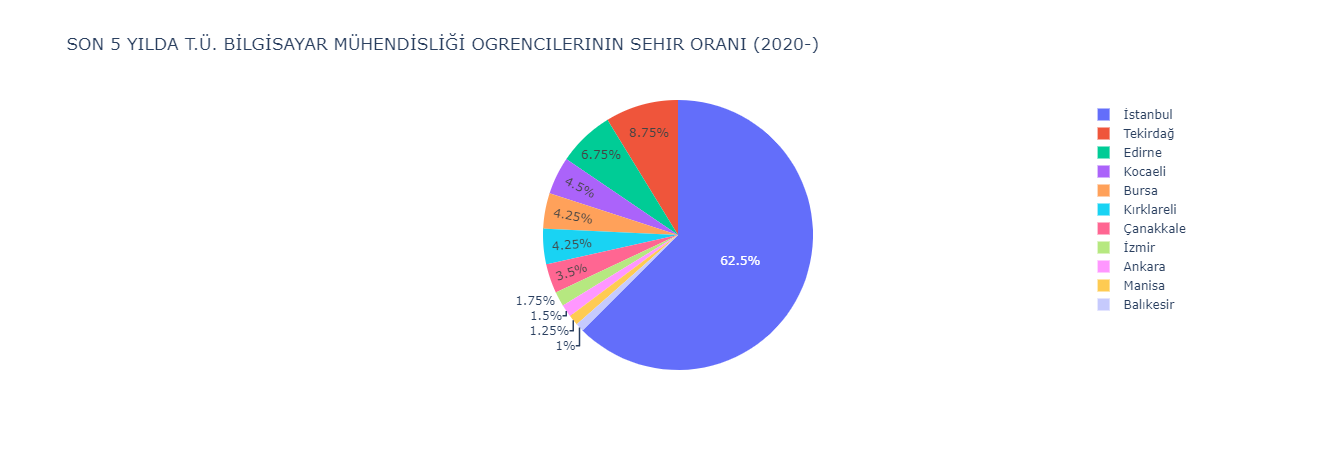

In [193]:
fig = px.pie(df_il, values='ogrenci sayisi', names='Sehir', title='SON 5 YILDA T.Ü. BİLGİSAYAR MÜHENDİSLİĞİ OGRENCILERININ SEHIR ORANI (2020-)')
fig.show()

In [196]:
df_cog=pd.read_csv('cografi_bolge.csv',encoding='ISO-8859-9')
df_cog['toplam']=df_cog['2020']+df_cog['2019']+df_cog['2018']+df_cog['2017']+df_cog['2016']
df_cog.drop(['2020','2019','2018','2017','2016'], inplace=True, axis=1)
df_cog

Unnamed: 0  toplam
0            Akdeniz       5
1       Doğu Anadolu       6
2                Ege      17
3  Güneydoğu Anadolu       6
4         İç Anadolu      14
5          Karadeniz      20
6            Marmara     387

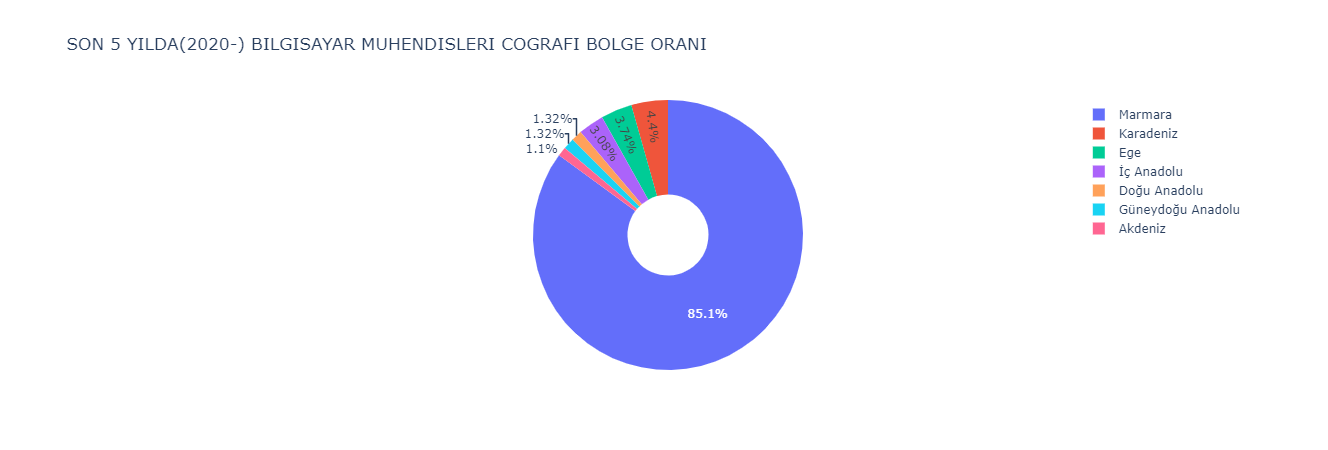

In [220]:
fig = {
  "data": [
    {
      "values": df_cog['toplam'],
      "labels": df_cog['Unnamed: 0'],
      "domain": {"x": [0.5, .5]},
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"SON 5 YILDA(2020-) BILGISAYAR MUHENDISLERI COGRAFI BOLGE ORANI",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id="2"></a> <br>
# DERSLER

In [199]:
df_kalan=pd.read_csv('bolum_dersleri.csv')
df_kalan['Toplam_Alınan']=df_kalan['2020']+df_kalan['2019']+df_kalan['2018']+df_kalan['2017']
df_kalan[:10]

Unnamed: 0   2020   2019   2018   2017 dönem  \
0         Hata Düzelten Kodlara Giriş   50.0   41.0   33.0   21.0   güz   
1            Elektrik Devre Temelleri  209.0  200.0  206.0  182.0   güz   
2     Bilgisayar Mühendisliğine Giriş  176.0  180.0  182.0  146.0   güz   
3                İşletim Sistemleri 1  124.0  135.0  142.0  112.0   güz   
4    Birleştirici Dil ile Programlama  243.0  212.0  203.0  188.0   güz   
5                         Matematik 1    NaN  215.0    NaN  202.0   güz   
6    Formel Diller ve Soyut Makineler  149.0  133.0  111.0  110.0   güz   
7                         Türk Dili 1    NaN  127.0    NaN   98.0   güz   
8  Atatürk İlkeleri ve İnkılap Tarihi    NaN  127.0    NaN  102.0   güz   
9                  Görsel Programlama  205.0  169.0  192.0  166.0   güz   

   sınıf  akts  zorunlu                       akademisyen  Toplam_Alınan  
0    4.0   5.0      0.0         Dr. Öğr. Üyesi Derya Arda          145.0  
1    2.0   4.0      1.0  Prof. Dr. Muharrem Tolga Sakallı          797.0  
2    1.0   6.0      1.0        Dr. Öğr. Üyesi Andaç Mesut          684.0  
3    3.0   4.0      1.0               Doç. Dr. İlhan Umut          513.0  
4    2.0   5.0      1.0        Dr. Öğr. Üyesi Andaç Mesut          846.0  
5    1.0   6.0      1.0              Doç. Dr. Seçil Çeken            NaN  
6    4.0   4.0      1.0        Dr. Öğr. Üyesi Özlem Aydın          503.0  
7    1.0   2.0      1.0                               NaN            NaN  
8    2.0   2.0      1.0                               NaN            NaN  
9    3.0   5.0      1.0        Dr. Öğr. Üyesi Aydın Carus          732.0

In [200]:
df_kalan_sirali3=df_kalan.copy()
df_kalan_sirali3=df_kalan.groupby(['akademisyen']).sum()
df_kalan_sirali3=df_kalan_sirali3.sort_values(by=['Toplam_Alınan'],ascending=False)
df_kalan_sirali3=df_kalan_sirali3.reset_index()
df_kalan_sirali3.drop(['akts', 'sınıf','zorunlu'], axis=1,inplace=True)

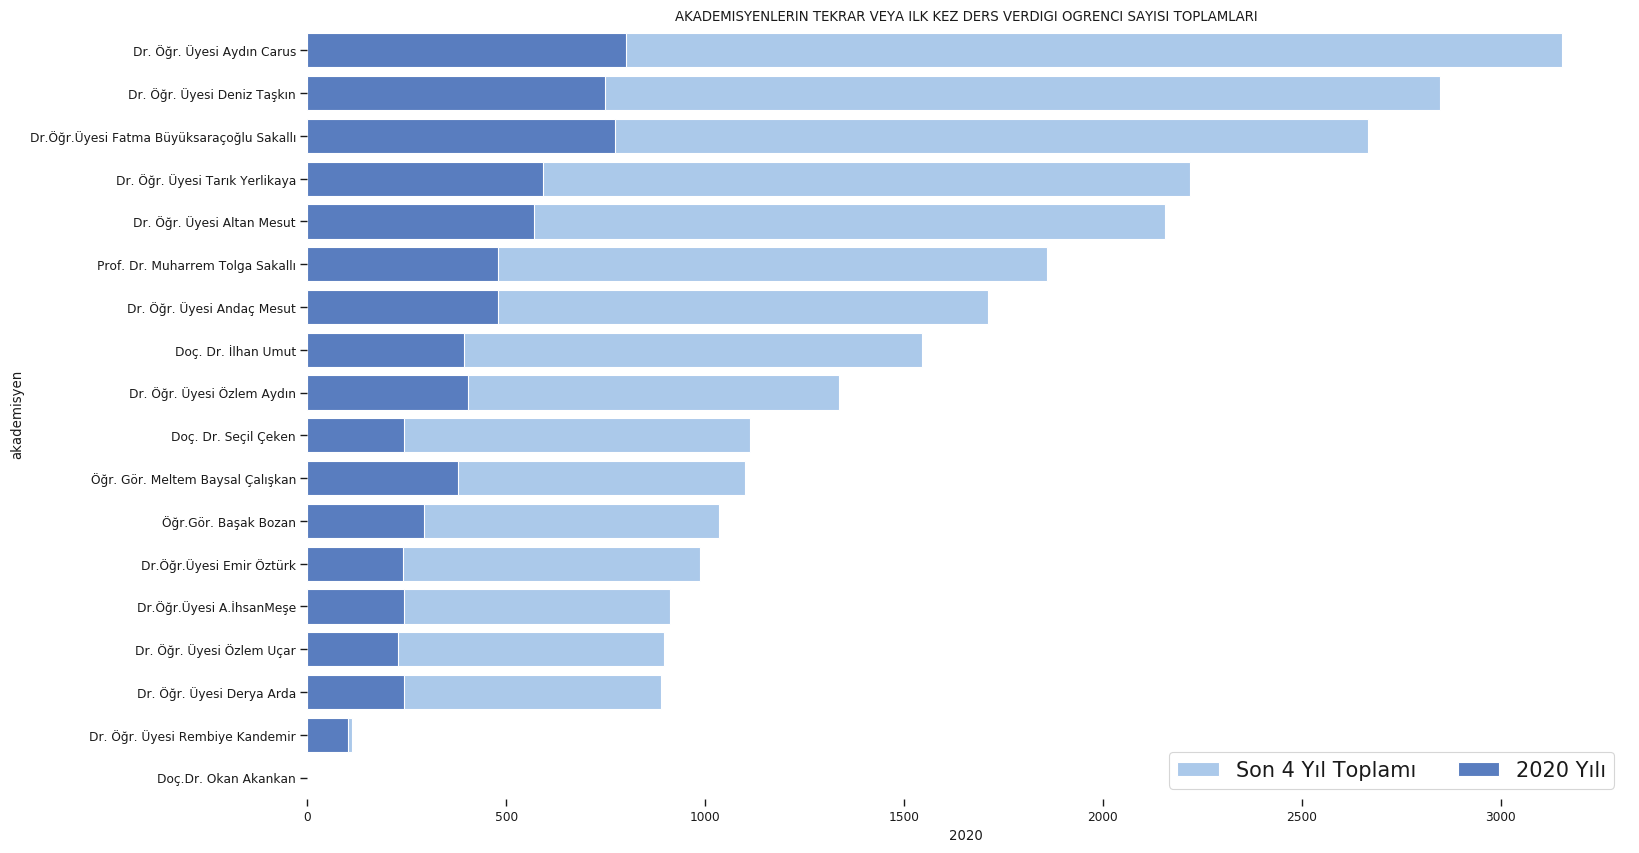

In [201]:
sns.set_context('paper')
f, ax = plt.subplots(figsize = (17,10))
sns.set_color_codes('pastel')
sns.barplot(x = 'Toplam_Alınan', y = 'akademisyen', data = df_kalan_sirali3,
            label = 'Son 4 Yıl Toplamı', color = 'b', edgecolor = 'w').set_title('AKADEMISYENLERIN TEKRAR VEYA ILK KEZ DERS VERDIGI OGRENCI SAYISI TOPLAMLARI')
sns.set_color_codes('muted')
sns.barplot(x = '2020', y = 'akademisyen', data = df_kalan_sirali3,
            label = '2020 Yılı', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right',prop={'size': 15})
sns.despine(left = True, bottom = True)
plt.show()

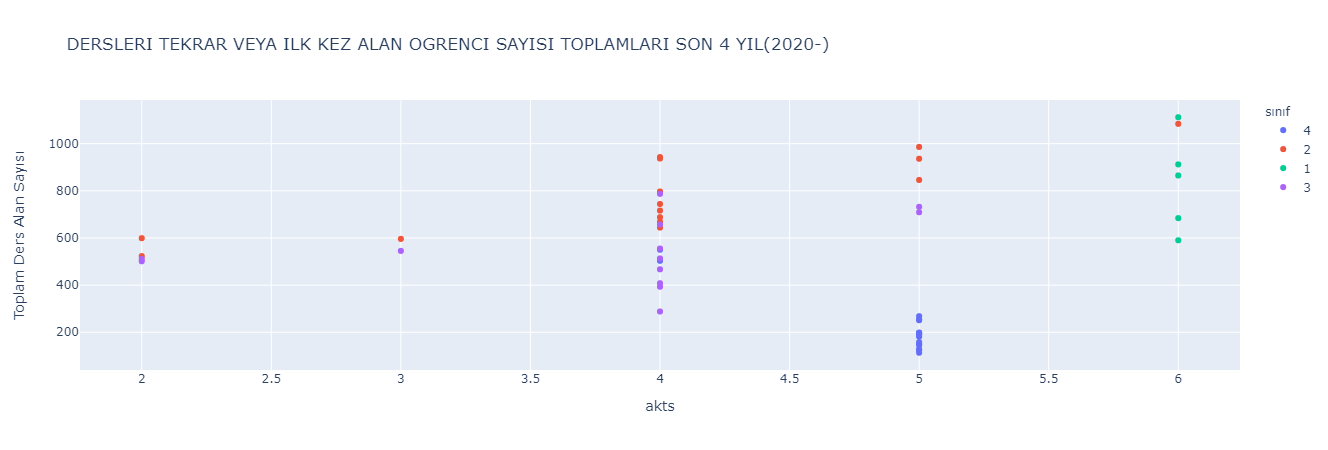

In [117]:
df_kalan3=df_kalan.copy()
df_kalan3.rename(columns={'Toplam_Alınan': 'Toplam Ders Alan Sayısı'}, inplace=True)

df_kalan3.dropna(inplace=True)
df_kalan3['sınıf']=df_kalan3['sınıf'].astype(int)
df_kalan3['sınıf']=df_kalan3['sınıf'].astype(str)

fig = px.scatter(df_kalan3, y='Toplam Ders Alan Sayısı', x='akts', color="sınıf",
                 title="DERSLERI TEKRAR VEYA ILK KEZ ALAN OGRENCI SAYISI TOPLAMLARI SON 4 YIL(2020-)")
fig.show()

In [202]:
df_kalan8=df_kalan.copy()
df_kalan8=df_kalan8[df_kalan8['zorunlu']==1.0]
df_kalan8=df_kalan8.sort_values(by=['Toplam_Alınan'],ascending=False)

In [203]:
df_kalan8=df_kalan8.filter(['Unnamed: 0','Toplam_Alınan'],axis=1).copy()
df_kalan8.dropna(inplace=True)

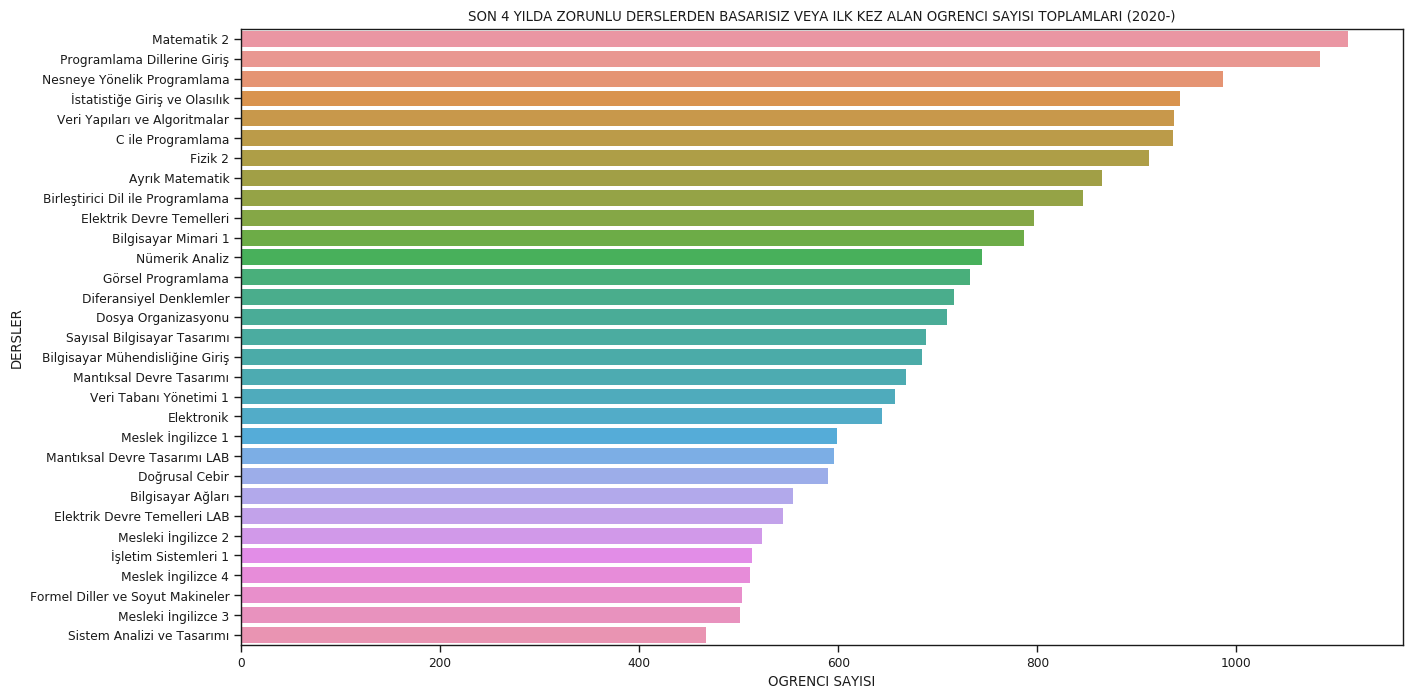

In [204]:
plt.figure(figsize=(15,8))
sns.barplot(y=df_kalan8['Unnamed: 0'], x=df_kalan8['Toplam_Alınan'])
plt.xticks(rotation= 0)
plt.xlabel('OGRENCI SAYISI')
plt.ylabel('DERSLER')
plt.title('SON 4 YILDA ZORUNLU DERSLERDEN BASARISIZ VEYA ILK KEZ ALAN OGRENCI SAYISI TOPLAMLARI (2020-)');

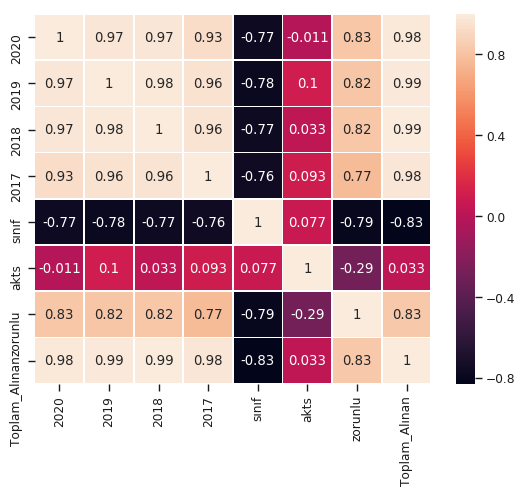

In [207]:
sns.heatmap(df_kalan.corr(),annot=True,linewidths=.5);

In [122]:
print('\033[1m'+'\n Yıllara göre Dersten Başarısız Veya Dersi İlk Kez Almış Öğrenci Değerleri Toplamları:\n 2020:',df_kalan['2020'].sum(),'Kişi','\n 2019:',df_kalan['2019'].sum(),'Kişi','\n 2018:',df_kalan['2018'].sum(),'Kişi','\n 2017:',df_kalan['2017'].sum(),'Kişi',
      '\n\n Dönemlere Göre Dersten Başarısız Veya Dersi İlk Kez Almış Öğrenci Değerleri Toplamları(2017-20):\n','GÜZ:',df_kalan[df_kalan['dönem']=='güz']['Toplam_Alınan'].sum(),'Kişi','\n BAHAR:',df_kalan[df_kalan['dönem']=='bahar']['Toplam_Alınan'].sum(),'Kişi')


 Yıllara göre Dersten Başarısız Veya Dersi İlk Kez Almış Öğrenci Değerleri Toplamları:
 2020: 7215.0 Kişi 
 2019: 7733.0 Kişi 
 2018: 6719.0 Kişi 
 2017: 6856.0 Kişi 

 Dönemlere Göre Dersten Başarısız Veya Dersi İlk Kez Almış Öğrenci Değerleri Toplamları(2017-20):
 GÜZ: 12824.0 Kişi 
 BAHAR: 13716.0 Kişi


<a id="3"></a> <br>
# NOT ORTALAMASI BAŞARILARI(%10)

In [74]:
df_yuzde=pd.read_csv('yuzde_on.csv')
df_yuzde['ISIMSOYISIM']=df_yuzde['ISIM']+" "+ df_yuzde['SOYISIM']
df_yuzde[:10]

ISIM        SOYISIM  CINSIYET  SIRA  SINIF   YIL DONEM  ORTALAMA  \
0     BURAK        ŞİRİNER         1     1      4  2018   GÜZ      3.95   
1  İSMAİLOU          SADOU         1     2      4  2018   GÜZ      3.86   
2   TUNAHAN         OKUNAN         1     3      4  2018   GÜZ      3.73   
3   İSMAİL           KASAP         1     4      4  2018   GÜZ      3.52   
4     BUĞRA       AYDINGÖZ         1     5      4  2018   GÜZ      3.49   
5  TRINALDI  RIZKI PERMANA         1     6      4  2018   GÜZ      3.47   
6      ERAY          DEMİR         1     7      4  2018   GÜZ      3.29   
7     SELİN       BUYURMAN         0     8      4  2018   GÜZ      3.23   
8      OKAN           ÜNLÜ         1     9      4  2018   GÜZ      3.23   
9      OZAN      TABAKOĞLU         1    10      4  2018   GÜZ      3.16   

   NUMARA(S2)             ISIMSOYISIM  
0          71           BURAK ŞİRİNER  
1           2          İSMAİLOU SADOU  
2          88          TUNAHAN OKUNAN  
3          36           İSMAİL  KASAP  
4          20          BUĞRA AYDINGÖZ  
5           4  TRINALDI RIZKI PERMANA  
6           9              ERAY DEMİR  
7          34          SELİN BUYURMAN  
8          62               OKAN ÜNLÜ  
9           2          OZAN TABAKOĞLU

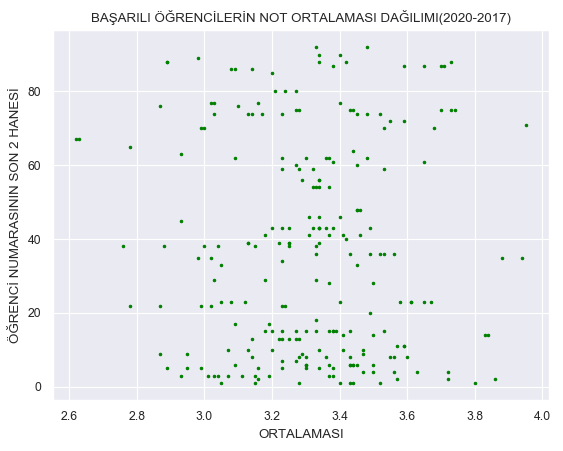

In [136]:
plt.scatter(df_yuzde['ORTALAMA'], df_yuzde['NUMARA(S2)'], color = "green", s = 3, label = "Gözlem Birimleri")
plt.title("BAŞARILI ÖĞRENCİLERİN NOT ORTALAMASI DAĞILIMI(2020-2017)")
plt.xlabel("ORTALAMASI")
plt.ylabel("ÖĞRENCİ NUMARASININ SON 2 HANESİ");

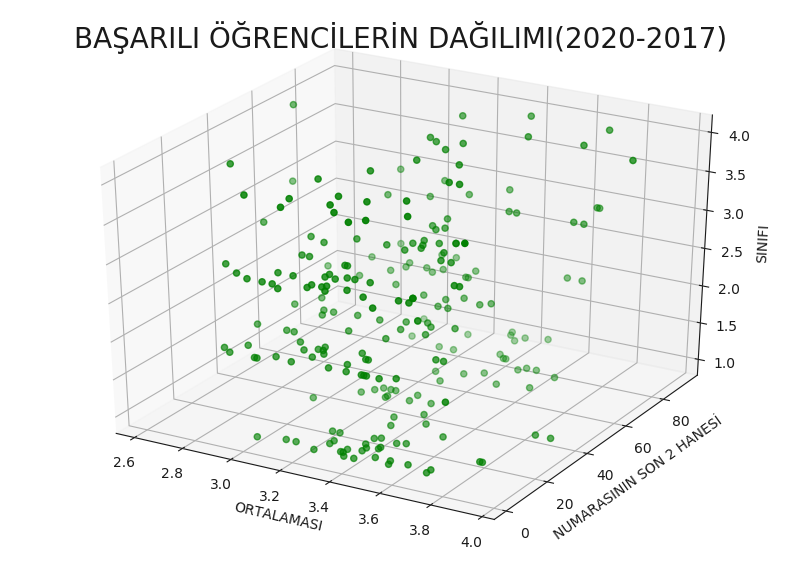

In [168]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_yuzde['ORTALAMA'], df_yuzde['NUMARA(S2)'], df_yuzde['SINIF'], color = "green")
plt.title("BAŞARILI ÖĞRENCİLERİN DAĞILIMI(2020-2017)", fontsize=20)
plt.ylabel("NUMARASININ SON 2 HANESİ")
plt.xlabel("ORTALAMASI")
ax.set_zlabel('SINIFI')
 
# show plot
plt.show();

#### Başarılı Olmak İçin Güven Aralığı

In [211]:
# %10'a girmek için gereken not ortalaması güven aralığının hesaplanması
import statsmodels.stats.api as sms
print('\033[1m'+'İstatistiki olarak %95 güvenilirlik ile gereken not ortalaması aralığı:\n',sms.DescrStatsW(df_yuzde['ORTALAMA']).tconfint_mean())

İstatistiki olarak %95 güvenilirlik ile gereken not ortalaması aralığı:
 (3.282756431462229, 3.343101309123545)


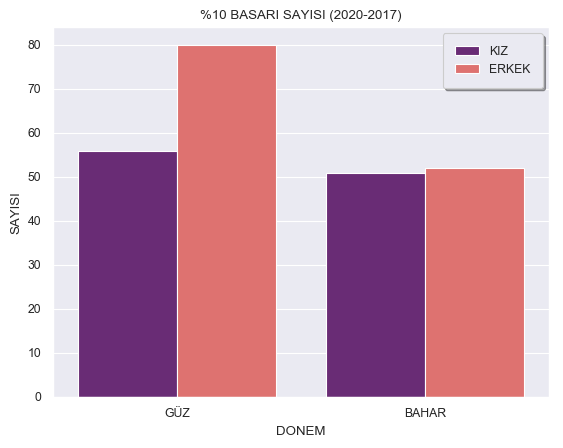

In [76]:
sns.set()
sns.set_context('paper')
sns.countplot(x = 'DONEM', hue = 'CINSIYET', data = df_yuzde, palette = 'magma')
plt.title('%10 BASARI SAYISI (2020-2017)')
plt.ylabel("SAYISI")
plt.legend( ['KIZ', 'ERKEK'],fancybox=True, framealpha=1, shadow=True, borderpad=1);
plt.show()

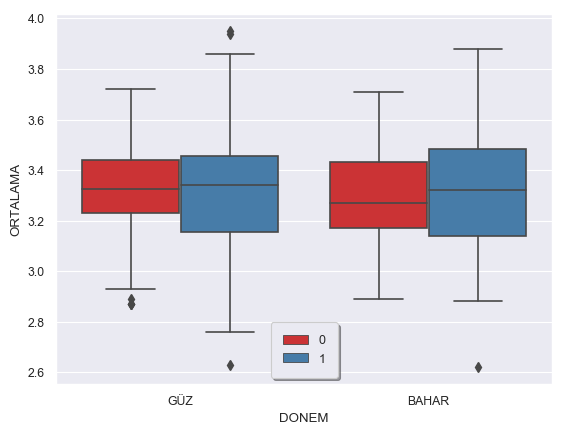

In [77]:
ax = sns.boxplot(x="DONEM", y="ORTALAMA", hue="CINSIYET",
                 data=df_yuzde, palette="Set1")
plt.legend( loc='lower center',fancybox=True, framealpha=1, shadow=True, borderpad=1,fontsize=9);

In [80]:
a=pd.DataFrame(df_yuzde['ISIMSOYISIM'].value_counts())
a_list=[a.index[:16]]

bbd_l=[]
sinif=[]
cinsiyet_l=[]
isim_l=[]
for i in range(16):
    #listelere her kişi için gerekli değerlerin eklenmesi    
    bbd_l.append(    np.mean(1/df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][i]]['SIRA'])*np.mean(df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][i]]['ORTALAMA'])*df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][0]]['ISIM'].count())
    sinif.append(df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][i]]['SINIF'].max())
    cinsiyet_l.append(df_yuzde[df_yuzde['ISIMSOYISIM']==a_list[0][i]]['CINSIYET'].max())
    isim_l.append(a_list[0][i])

# oluşturulan listelerle sözlük vasıtasıyla dataframe oluşturma  
dict = {'SON 3 YILIN EN BAŞARILI ÖĞRENCİLERİ (2020-)': isim_l, 'BÖLÜM BAŞARI DEĞERİ': bbd_l, 'SINIF': sinif,'CİNSİYET':cinsiyet_l}  
df_basari = pd.DataFrame(dict) 
df_basari=df_basari.sort_values(by=['BÖLÜM BAŞARI DEĞERİ'],ascending=False)
df_basari=df_basari.reset_index(drop=True)

# DataFrame görselleştirme
cm = sns.light_palette("green", as_cmap=True)
s = df_basari.style.background_gradient(cmap=cm)
s
# bölüm başarı değeri(başarı metriği) =  ( 1 / (%10 listesindeki ortalama sırası)) x (%10'a girdiği notlar ortalaması) x (%10'a girme sayısı)
# bölümdeki en başarılı 16 kişi(en az 4 kez %10'da bulunma şartını sağlayan))

In [81]:
df_yuzde_rekor=df_yuzde[df_yuzde['ORTALAMA']> 3.70] 
df_yuzde_rekor=df_yuzde_rekor.filter(['CINSIYET','SIRA','SINIF','YIL','DONEM','ORTALAMA','NUMARA(S2)','ISIMSOYISIM'])
df_yuzde_rekor=df_yuzde_rekor.reset_index(drop=True)
df_yuzde_rekor.rename(columns={'ISIMSOYISIM': 'SON 3 YILDA EN YÜKSEK ORTALAMALARA ULAŞAN ÖĞRENCİLER(2020-)'}, inplace=True)

# dataframe görselleştirme
cm2 = sns.light_palette("blue", as_cmap=True)
s2 = df_yuzde_rekor.style.background_gradient(cmap=cm2)
s2

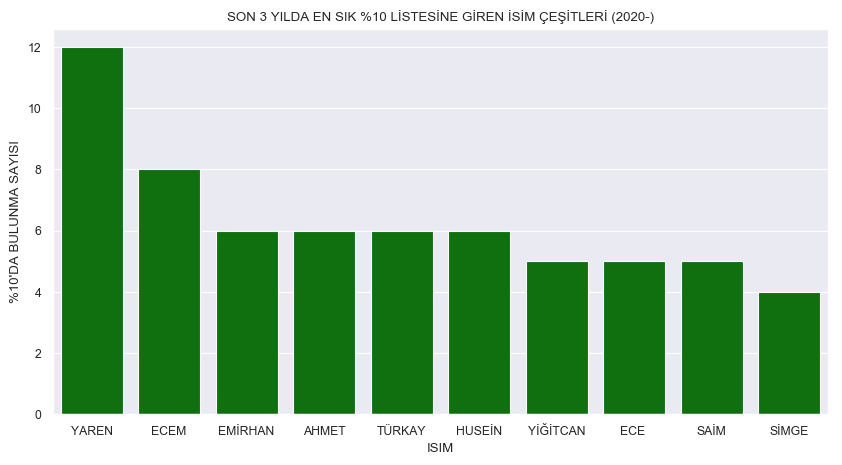

In [82]:
df_yuzde7=pd.DataFrame(df_yuzde['ISIM'].value_counts().head(10))
df_yuzde7.reset_index(inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(x=df_yuzde7['index'], y=df_yuzde7['ISIM'],color=(0.0, 0.5, 0.0, 0.5))
plt.xticks(rotation= 0)
plt.xlabel('ISIM')
plt.ylabel("%10'DA BULUNMA SAYISI")
plt.title('SON 3 YILDA EN SIK %10 LİSTESİNE GİREN İSİM ÇEŞİTLERİ (2020-)');
# EN BAŞARILI İSİMLER

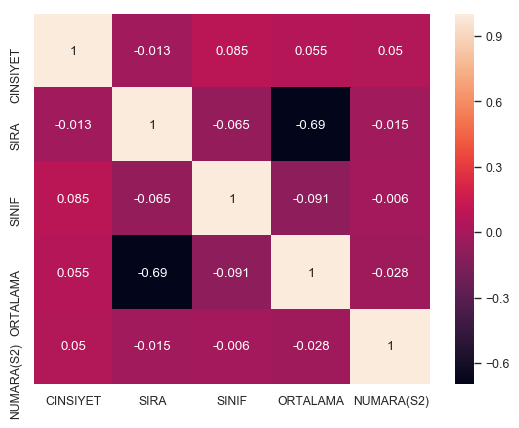

In [83]:
df_yuzde_corr=df_yuzde.drop('YIL',axis=1)
sns.heatmap(df_yuzde_corr.corr(),annot=True);

<a id="4"></a> <br>
## AKADEMISYENLER

In [ ]:
df_aka_orj=pd.read_csv('akademisyenler.csv',encoding='ISO-8859-9')
df_aka_orj=df_aka_orj.sort_values(by=['Yayınlar ve Makaleler'],ascending=False)
df_aka_orj.head()
df_aka=df_aka_orj.copy()
df_aka_orj

In [187]:
df_mak=df_aka_orj.set_index('Unnamed: 0')
df_mak=df_mak['Yayınlar ve Makaleler']
df_mak=pd.DataFrame(df_mak)
df_mak=df_mak.reset_index()
df_mak.columns=[0,1]

In [188]:
df_aka=pd.read_csv('akademisyenler.csv',encoding='ISO-8859-9')
df_aka=df_aka.sort_values(by=['Yayınlar ve Makaleler'],ascending=False)
del df_aka['unvan']
df_aka=df_aka.reset_index()
del df_aka['index']

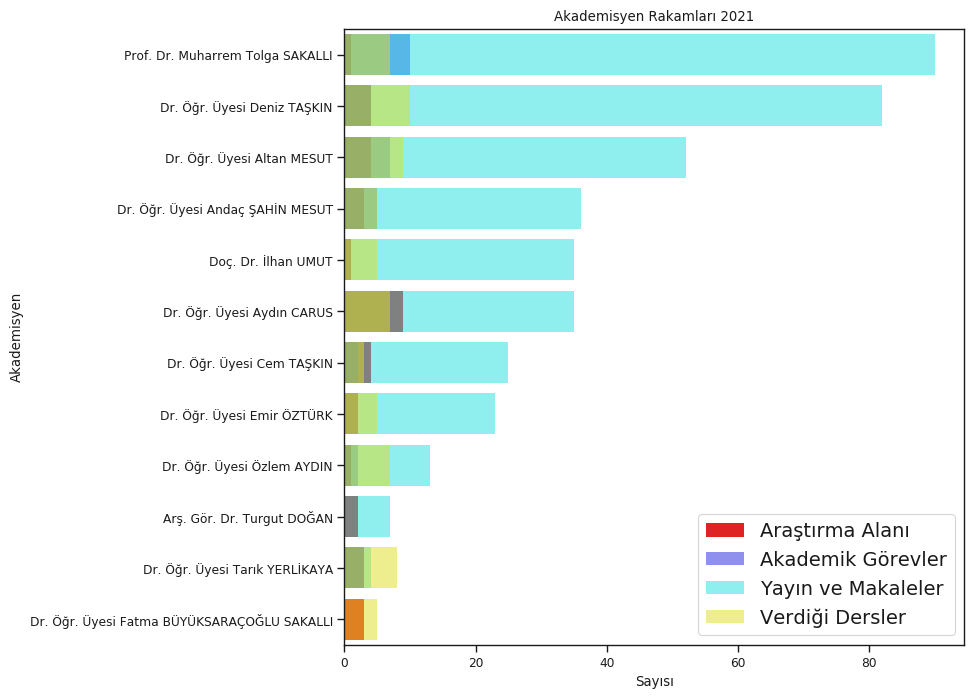

In [212]:

f,ax = plt.subplots(figsize = (8,8))
sns.barplot(x=df_aka['Araştırma Alanları'],y=df_aka['Unnamed: 0'],color='red',alpha = 0.99,label='Araştırma Alanı' )
sns.barplot(x=df_aka['Akademik Görevler'],y=df_aka['Unnamed: 0'],color='blue',alpha = 0.5,label='Akademik Görevler')
sns.barplot(x=df_aka['Yayınlar ve Makaleler'],y=df_aka['Unnamed: 0'],color='cyan',alpha = 0.5,label='Yayın ve Makaleler')
sns.barplot(x=df_aka['Verdiği Dersler'],y=df_aka['Unnamed: 0'],color='yellow',alpha = 0.5,label='Verdiği Dersler')

ax.legend(loc='lower right',frameon = True,prop={'size': 14})    
ax.set(xlabel='Sayısı', ylabel='Akademisyen',title = "Akademisyen Rakamları 2021");

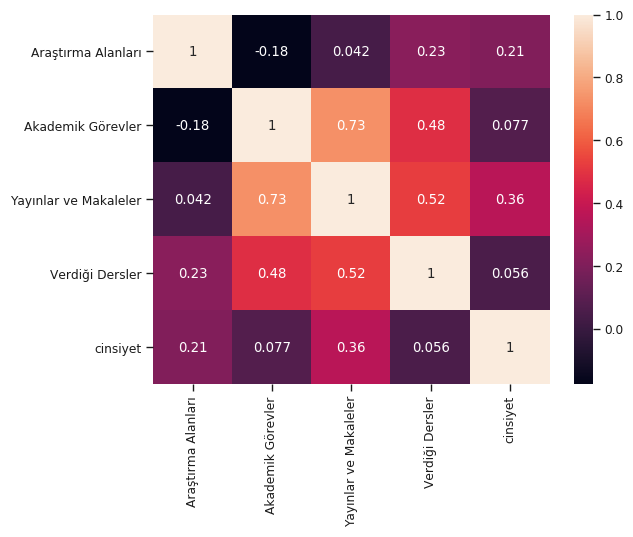

In [213]:
sns.heatmap(df_aka.corr(),annot=True);

<a id="5"></a> <br>
# BOLUMUN PUANI 

In [84]:
df_devuni=pd.read_csv('bilg_muh_devlet.csv',encoding='utf-8')
df_devuni[:10]

UNI  \
0             BOĞAZİÇİ ÜNİVERSİTESİ (Devlet)   
1     ORTA DOĞU TEKNİK ÜNİVERSİTESİ (Devlet)   
2      İSTANBUL TEKNİK ÜNİVERSİTESİ (Devlet)   
3          GALATASARAY ÜNİVERSİTESİ (Devlet)   
4            HACETTEPE ÜNİVERSİTESİ (Devlet)   
5        YILDIZ TEKNİK ÜNİVERSİTESİ (Devlet)   
6           TÜRK-ALMAN ÜNİVERSİTESİ (Devlet)   
7  İZMİR YÜKSEK TEKNOLOJİ ENSTİTÜSÜ (Devlet)   
8         GEBZE TEKNİK ÜNİVERSİTESİ (Devlet)   
9               ANKARA ÜNİVERSİTESİ (Devlet)   

                                 BOLUM  Yabancı Dil  Unnamed: 3  PUAN  \
0  Bilgisayar Mühendisliği (İngilizce)            1          85   546   
1  Bilgisayar Mühendisliği (İngilizce)            1         105   539   
2  Bilgisayar Mühendisliği (İngilizce)            1         110   532   
3  Bilgisayar Mühendisliği (Fransızca)            1          30   520   
4  Bilgisayar Mühendisliği (İngilizce)            1         100   516   
5              Bilgisayar Mühendisliği            0         100   508   
6    Bilgisayar Mühendisliği (Almanca)            1          50   498   
7  Bilgisayar Mühendisliği (İngilizce)            1          80   496   
8  Bilgisayar Mühendisliği (İngilizce)            1          85   492   
9  Bilgisayar Mühendisliği (İngilizce)            1          70   486   

   Unnamed: 5  
0       342.0  
1      1178.0  
2      2454.0  
3      5591.0  
4      7208.0  
5     11244.0  
6     16772.0  
7     18306.0  
8     20945.0  
9     25064.0

In [85]:
df_devuni2=df_devuni.filter(['UNI','Yabancı Dil','PUAN'])
df_devuni2[45:50]

UNI  Yabancı Dil  PUAN
45                 BALIKESİR ÜNİVERSİTESİ (Devlet)            0   398
46                    TRAKYA ÜNİVERSİTESİ (Devlet)            0   397
47  ALANYA ALAADDİN KEYKUBAT ÜNİVERSİTESİ (Devlet)            1   394
48          SÜLEYMAN DEMİREL ÜNİVERSİTESİ (Devlet)            0   393
49                    YALOVA ÜNİVERSİTESİ (Devlet)            0   393

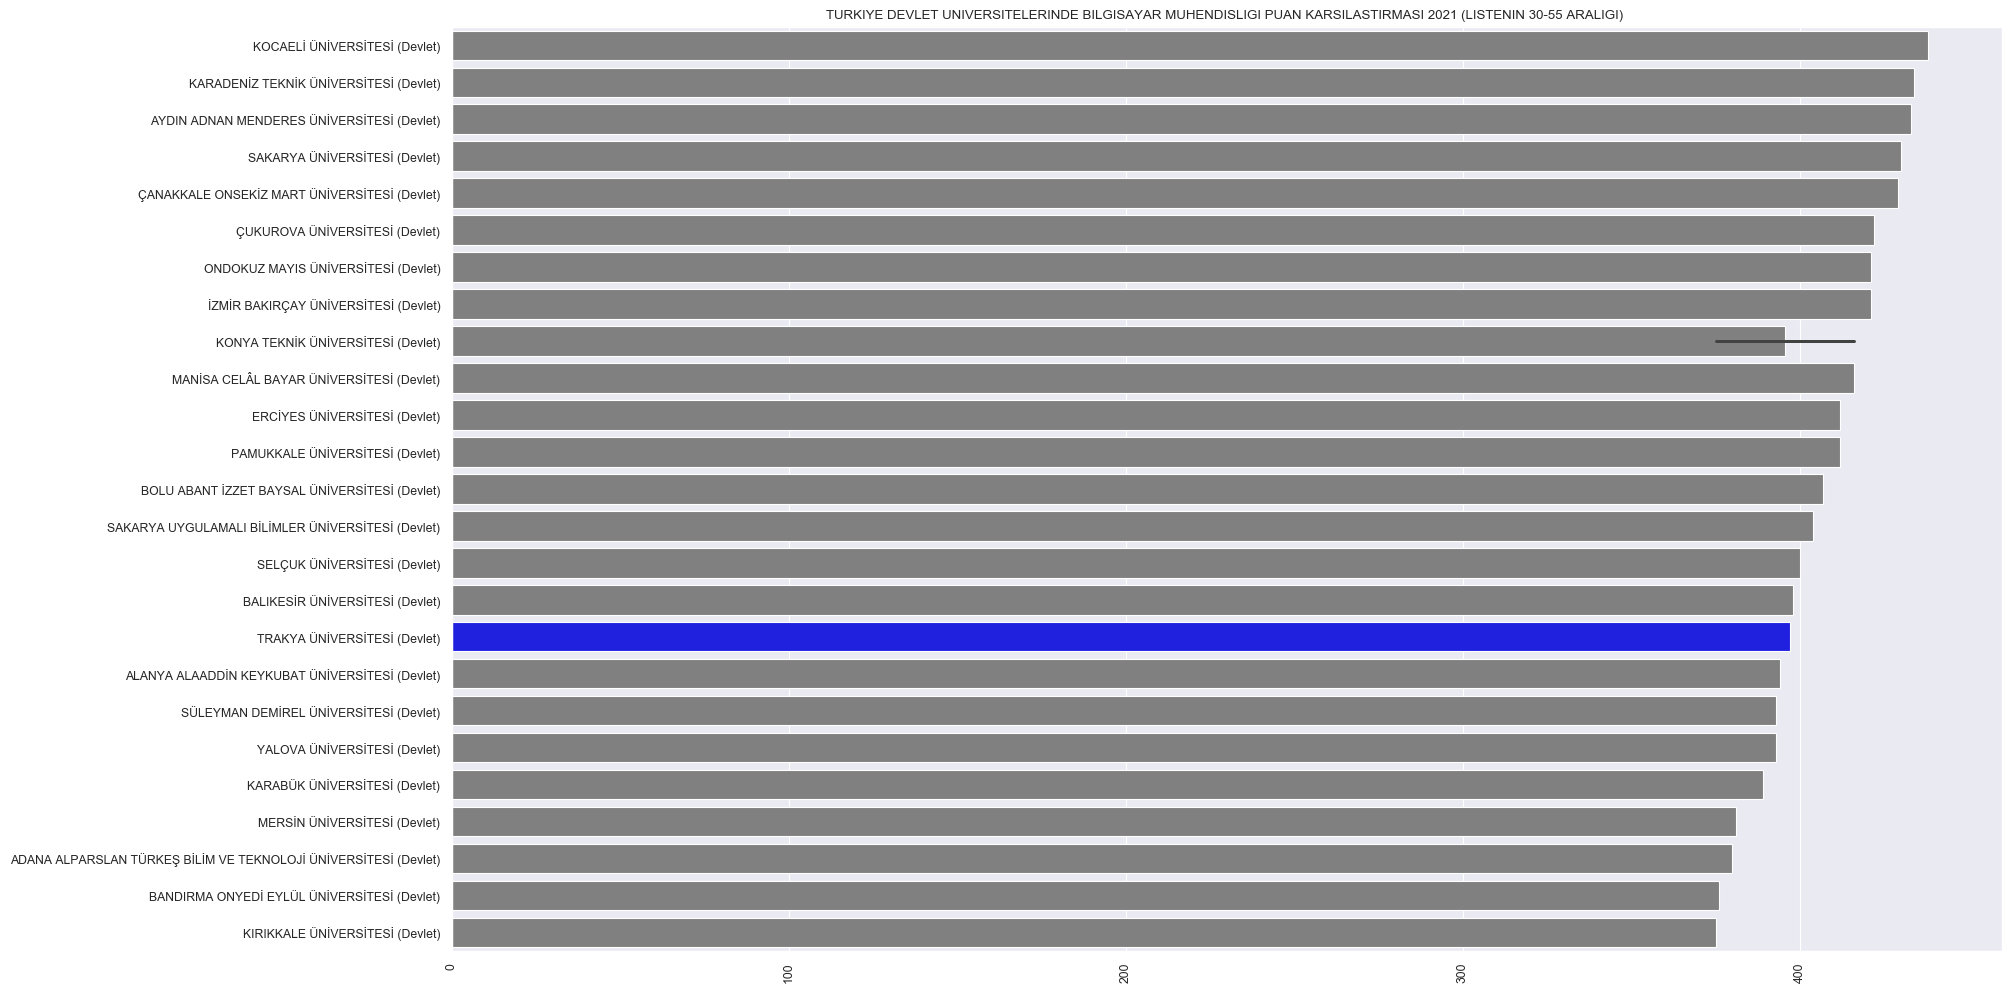

In [86]:
labels = np.array(df_devuni2['UNI'][30:])
values = np.array(df_devuni2['PUAN'][30:]) 
clrs = ['blue' if (x ==397) else 'grey' for x in values ]

plt.figure(figsize=(20,12))
#barplot
sns.barplot(y=labels, x=values, palette=clrs).set_title("TURKIYE DEVLET UNIVERSITELERINDE BILGISAYAR MUHENDISLIGI PUAN KARSILASTIRMASI 2021 (LISTENIN 30-55 ARALIGI) ")
plt.xticks(rotation=90);

In [87]:
df_uni=pd.read_csv('universite_bolumleri_prestij.csv',encoding='utf-8')
del df_uni['Unnamed: 0']
df_uni['Unnamed: 2']=='SAY'
df_uni[:10]

Unnamed: 1 Unnamed: 2  Unnamed: 3  \
0                                         Tıp        SAY         210   
1  Mütercim-Tercümanlık (Fakülte) (İngilizce)        DİL          60   
2          İngilizce Öğretmenliği (İngilizce)        DİL          85   
3                    Özel Eğitim Öğretmenliği        SÖZ          50   
4                               Diş Hekimliği        SAY          90   
5                    Okul Öncesi Öğretmenliği        SÖZ          60   
6                         Türkçe Öğretmenliği        SÖZ          40   
7    Mütercim-Tercümanlık (Fakülte) (Almanca)        DİL          60   
8              Almanca Öğretmenliği (Almanca)        DİL          50   
9                                   Eczacılık        SAY          90   

   Unnamed: 4  Unnamed: 5  
0   484.89131       12281  
1   400.09141       14790  
2   398.05492       15309  
3   398.25138       16017  
4   458.99365       24981  
5   386.63827       25198  
6   382.10626       29763  
7   327.62281       35625  
8   318.00181       38901  
9   433.80708       40369

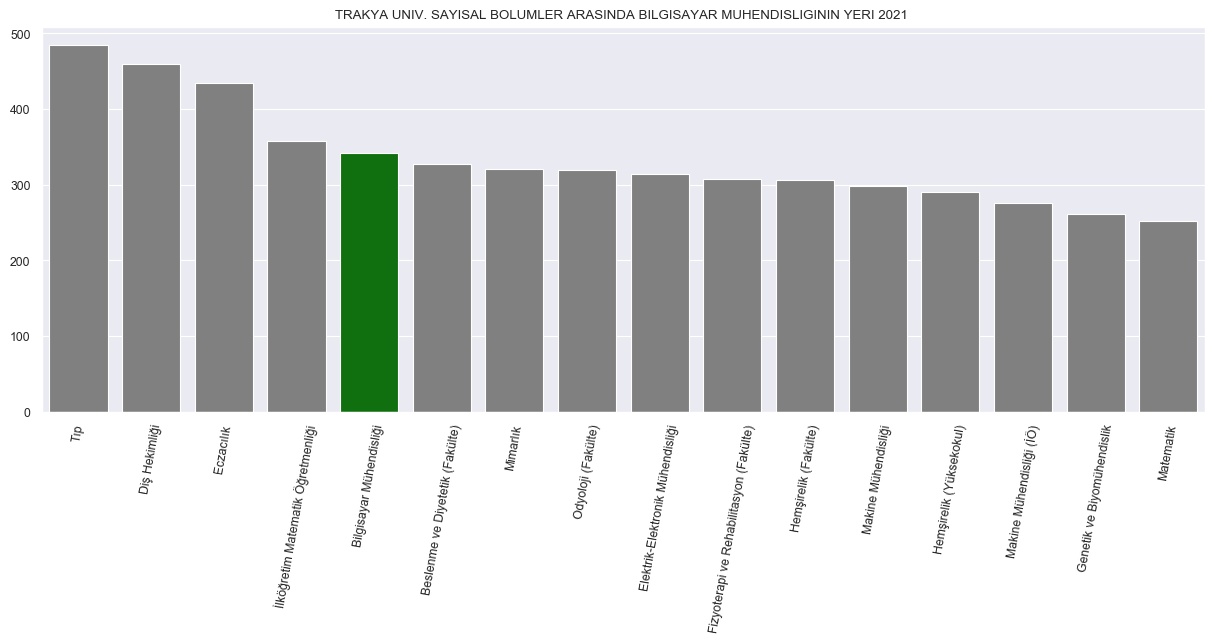

In [88]:
df_uni['Unnamed: 2']=='SAY'
df_uni_say=df_uni[df_uni['Unnamed: 2']=='SAY']

labels = np.array(df_uni_say['Unnamed: 1'])
values = np.array(df_uni_say['Unnamed: 4']) 
clrs = ['green' if (x ==342.42304) else 'grey' for x in values ]

plt.figure(figsize=(15,5))
#barplot
sns.barplot(x=labels, y=values, palette=clrs).set_title("TRAKYA UNIV. SAYISAL BOLUMLER ARASINDA BILGISAYAR MUHENDISLIGININ YERI 2021 ")
plt.xticks(rotation=80);

<a id="6"></a> <br>
# OGRENCI & MEZUN PROFILI

In [4]:
df_mez_orj=pd.read_csv('mezun-ogrenci_profili.csv')
del df_mez_orj['Unnamed: 0']
df_mez_orj.columns=['ISIM','BILGI','CINSIYET','ACIKLAMA','UNVAN','FIRMA','LINK']
df_mez=df_mez_orj.copy()
df_mez_orj[:15]


ISIM                                              BILGI  \
0              Cenk Akarsu                   Software Engineer II - Microsoft   
1              Murat AKKAŞ   Senior Software Development Specialist - LOGO...   
2              Şener Göçer                          Founder & CEO - GCR GROUP   
3             Hakan Güldal                 Dr. Öğr. Üyesi - Trakya University   
4              Şener Göçer                          Founder & CEO - GCR GROUP   
5   Tuğba Akbaşaran Yılmaz      Software Developer - Travix International ...   
6          Alperen Kapusuz   Trakya Üniversitesi - Pendik, İstanbul, Türki...   
7               Uzay Durdu   Computer Science Student - Trakya Üniversites...   
8              Cihad Küçük                                   Istanbul, Turkey   
9        Ufuk can KAHRAMAN         Trakya University - Bağcılar, İstanbul ...   
10         Hüsein Kantarci                            Intern - Nebula Bilişim   
11          Ecrin Sağlamcı            Trakya Üniversitesi - İstanbul, Türkiye   
12                Seda Gaş                 Junior Software Engineer - UCXtech   
13              Mert KORAY              Trakya Üniversitesi - Manisa, Türkiye   
14                Ali Avcı                      Trakya Üniversitesi – Türkiye   

    CINSIYET                                           ACIKLAMA  \
0          1  Installing the infrastructure of the Trakya Un...   
1          1  Univera Computer Systems AS. Trakya Üniversite...   
2          1  Image for Trakya Üniversitesi. Trakya Üniversi...   
3          1  Trakya UniversityTrakya Üniversitesi. Edirne ....   
4          1  Trakya Üniversitesi. Doctor of Philosophy (PhD...   
5          0  Trakya Üniversitesi. Bachelor of Engineering (...   
6          1  Computer Engineering Student at Trakya Univers...   
7          1  Trakya ÜniversitesiTrakya Üniversitesi. İstanb...   
8          1  TU IoT and Deep Learning Community, Co-Founder...   
9          1  Ufuk can KAHRAMAN | Bağcılar, İstanbul, Türkiy...   
10         1  Nebula BilişimTrakya Üniversitesi. 44 connecti...   
11         0  Kırklareli UniversityTrakya Üniversitesi ... I...   
12         0  UCXtechTrakya University. Kosovo500+ ... Bache...   
13         1  Mert KORAY. IEEE Trakya Leader of Advertising ...   
14         1  Univerza v Mariboru. Lisans Derecesi, Bilgisay...   

                         UNVAN                      FIRMA  \
0           Software Engineer                   Microsoft   
1         Software Developer                         LOGO   
2                Founder & CEO                  GCR GROUP   
3               Dr. Öğr. Üyesi          Trakya University   
4                Founder & CEO                  GCR GROUP   
5           Software Developer   Travix International ...   
6         Trakya Üniversitesi                               
7    Computer Science Student                               
8             Istanbul, Turkey                        NaN   
9            Trakya University                              
10                      Intern             Nebula Bilişim   
11         Trakya Üniversitesi                              
12           Software Engineer                    UCXtech   
13         Trakya Üniversitesi                        NaN   
14         Trakya Üniversitesi                        NaN   

                                                 LINK  
0         https://ie.linkedin.com/in/cenkakarsu/en-us  
1   https://se.linkedin.com/in/murat-akka%2525C5%2...  
2   https://www.linkedin.com/in/%25C5%259Fener-g%2...  
3                  https://tr.linkedin.com/in/hguldal  
4   https://www.linkedin.com/in/%25C5%259Fener-g%2...  
5                https://nl.linkedin.com/in/tobetuuba  
6   https://tr.linkedin.com/in/alperen-kapusuz-a72...  
7     https://tr.linkedin.com/in/uzay-durdu-6b88911a2  
8           https://tr.linkedin.com/in/cihadkck/en-us  
9   https://tr.linkedin.com/in/ufuk-can-kahraman-6...  
10  https://www.linkedin.com/in/h%25C3%25BCsein-ka...  
11 

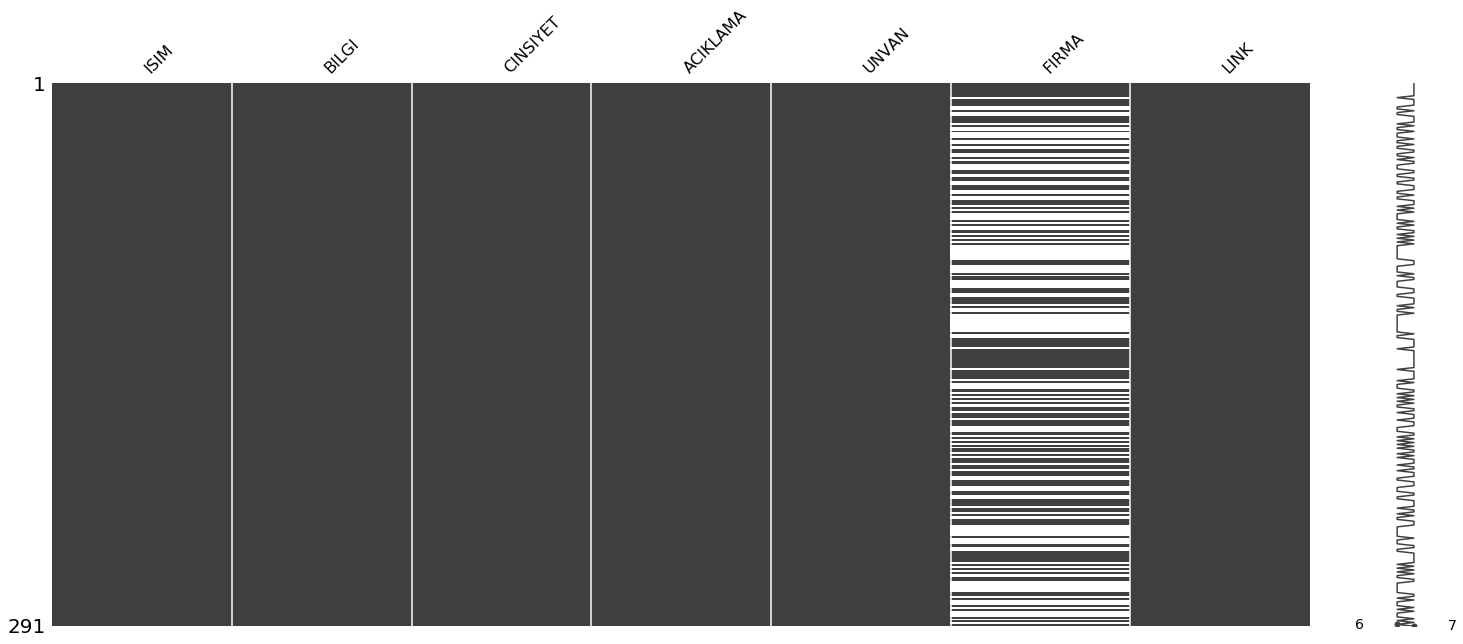

In [5]:
msno.matrix(df_mez);

## PROFIL ANALIZI

In [11]:
liste_acik=df_mez.ACIKLAMA

liste_aciklama=','.join(liste_acik)
liste_aciklama[:4000]

"Installing the infrastructure of the Trakya University Computer Engineering department Virtual ... Trakya Üniversitesi Bilgisayar Mühendisliği Mezunları. -. ASP.,Univera Computer Systems AS. Trakya Üniversitesi ... Trakya Üniversitesi. 3, Computer Engineering ... Ahmet Keskin. Ege Üniversitesi Bilgisayar Mühendisliği \xa0...,Image for Trakya Üniversitesi. Trakya Üniversitesi. Doctor of Philosophy (PhD), ... Trakya Üniversitesi. Doctor of Philosophy (PhD), Computer Engineering.,Trakya UniversityTrakya Üniversitesi. Edirne ... He completed his master's and doctoral studies in Computer Engineering department of the same university.,Trakya Üniversitesi. Doctor of Philosophy (PhD)Information Technology ... Trakya Üniversitesi. Doctor of Philosophy (PhD)Computer Engineering. 2002 - 2006\xa0...,Trakya Üniversitesi. Bachelor of Engineering (B.E.)Computer Engineering ... Trakya Üniversitesi Bilgisayar Mühendisliği Öğrencileri ve Mezunları. -. Tuğba.,Computer Engineering Student at Trakya Unive

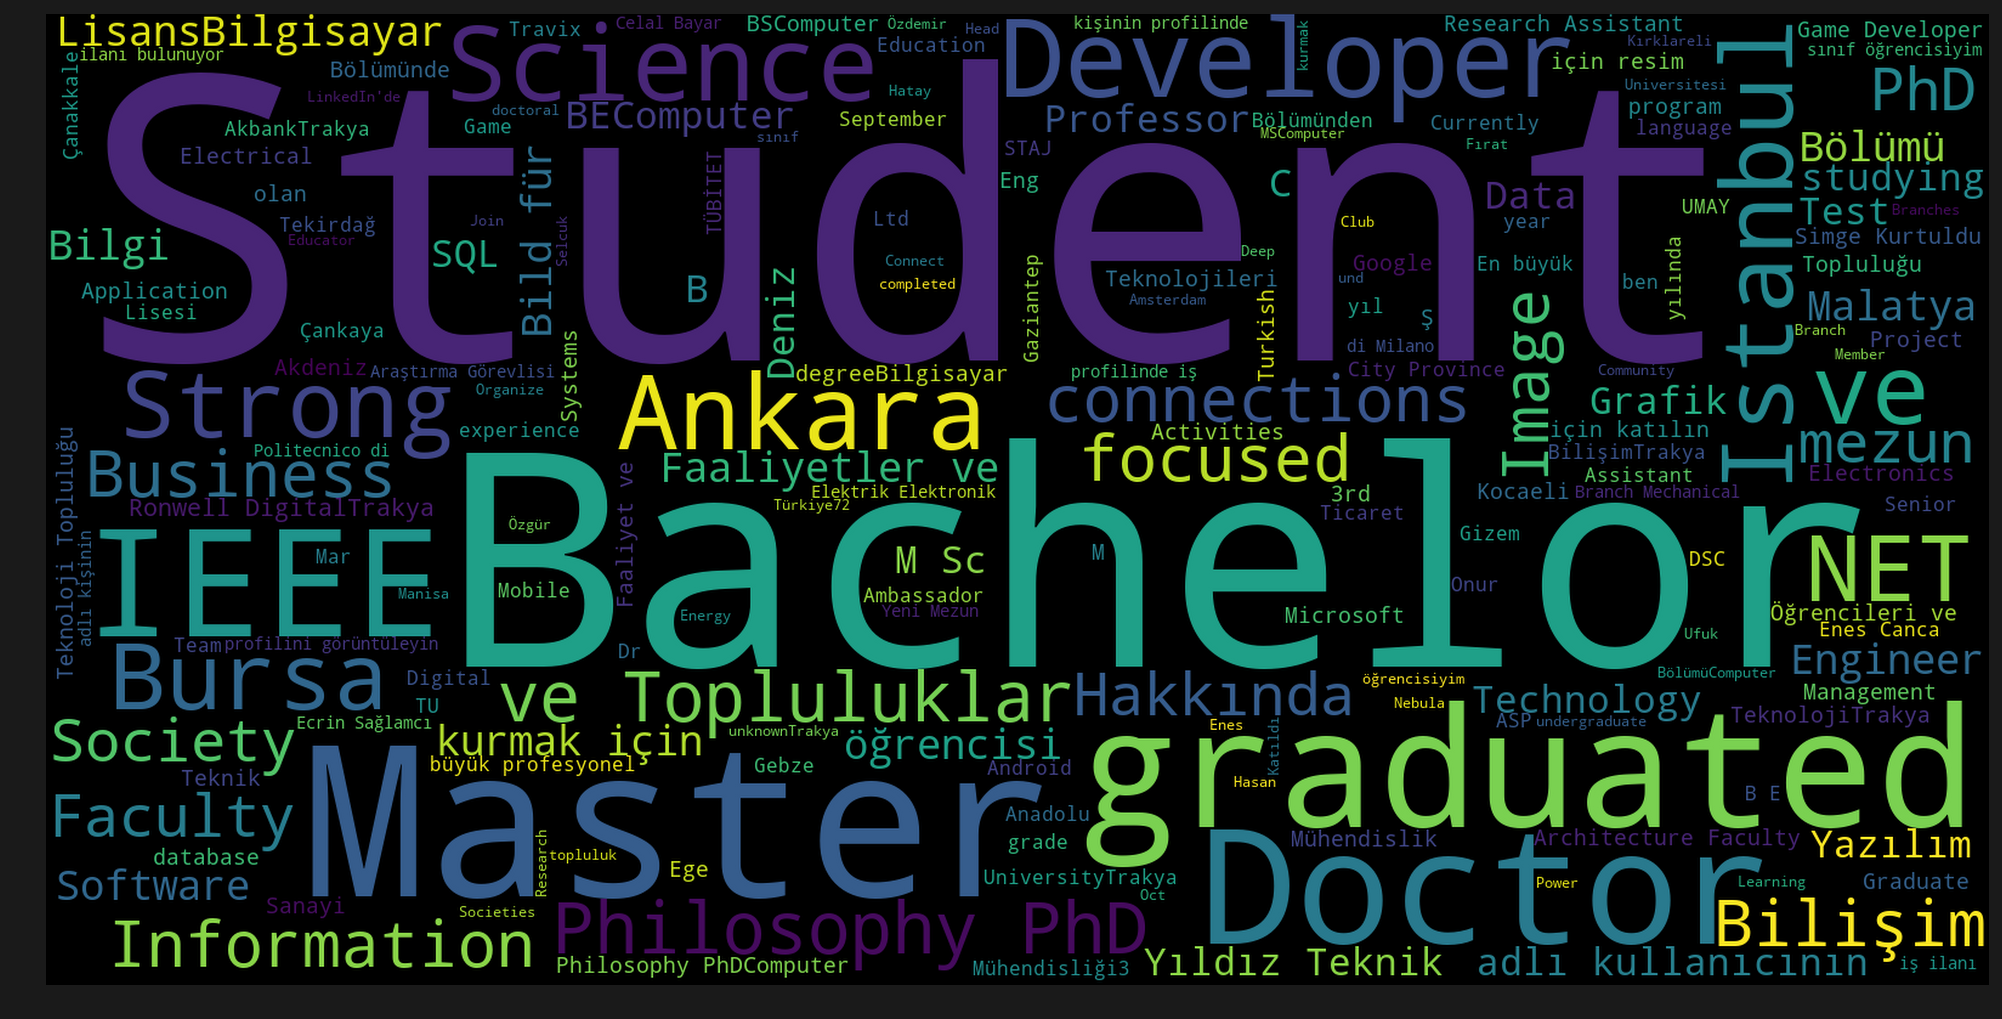

In [180]:
stopwords = set(STOPWORDS)
stopwords.update(["Computer", "University", "Trakya", "Mühendisliği", "Üniversitesi",'Engineering','Installing','Mezunları',
                  'Bilgisayar','Türkiye','İstanbul','bağlantı','Edirne',"Lisans","Derecesi","DerecesiBilgisayar","eğitim","kurumunda",
                 "şu","okulda","Turkey","Department","degreeComputer","Engineering3","öğrenci","Türkiye500","kurmak için",'degree','Yüksek',
                  'professional',"Engineering2","şirketinde"])


text = liste_aciklama
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords,background_color="black").generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='Lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


## CALISILAN KURUM

In [12]:
liste_company=df_mez.FIRMA
liste_company=liste_company.dropna()
liste_company=','.join(liste_company)
liste_company

' Microsoft, LOGO, GCR GROUP, Trakya University, GCR GROUP, Travix International ..., , , , Nebula Bilişim, , UCXtech, Yorunge Iletisim …, Borda Technology, KoçSistem, Özgür Yazılım A.Ş, Trakya University, Technoperia, Universum ..., HST Global, Travix International, 4Cast ..., Technoperia, Codevist Teknoloji, PAYNET ÖDEME HİZMETLERİ, Trakya Agricultural Research, Oxolo, IEEE TU, RE/MAX Türkiye, Business Systems, GDG Edirne, Everis, Genbil, Accenture, Sanction Scanner, Akademedya Yazılım, Amazon, Netas, Microsoft, Etiya, Bilgi İşlem Daire Başkanlığı, Cukurova Development , Xena Vision, Ithinka , Cigna Finans, Kuveyt Türk Katılım Bankası, Ziraat Teknoloji A.Ş, Accenture, AppyThings, Etiya, Akbank, Mutlubiev, VakıfBank, Netsparker, TesterYou, Cigna Finans, Microsoft , GfK, PAYNET ÖDEME,Anadolu Sigorta, Trius Bilişim Teknolojileri, Akbank, Firefly, VakıfBank, Innovance, Ronwell Digital, LOGO Yazılım, Token, LOGO, Mutlubiev, İnnova Bilişim, Saudi Arabian, Entropitek, Planet Group Internati

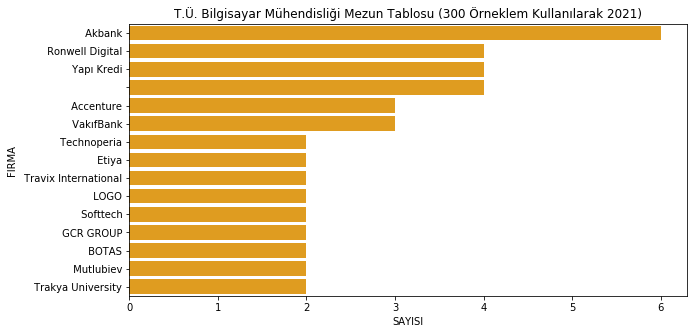

In [33]:
df_mez6=pd.DataFrame(df_mez[df_mez['FIRMA'].notnull()].filter(['UNVAN','FIRMA'])['FIRMA'].value_counts()[:15])
df_mez6=pd.DataFrame(df_mez6.reset_index())

plt.figure(figsize=(10,5))
sns.barplot(x=df_mez6['FIRMA'], y=df_mez6['index'],color=('orange'))
plt.xticks(rotation= 0)
plt.xlabel('SAYISI')
plt.ylabel("FIRMA")
plt.title('T.Ü. Bilgisayar Mühendisliği Mezun Tablosu (300 Örneklem Kullanılarak 2021)');

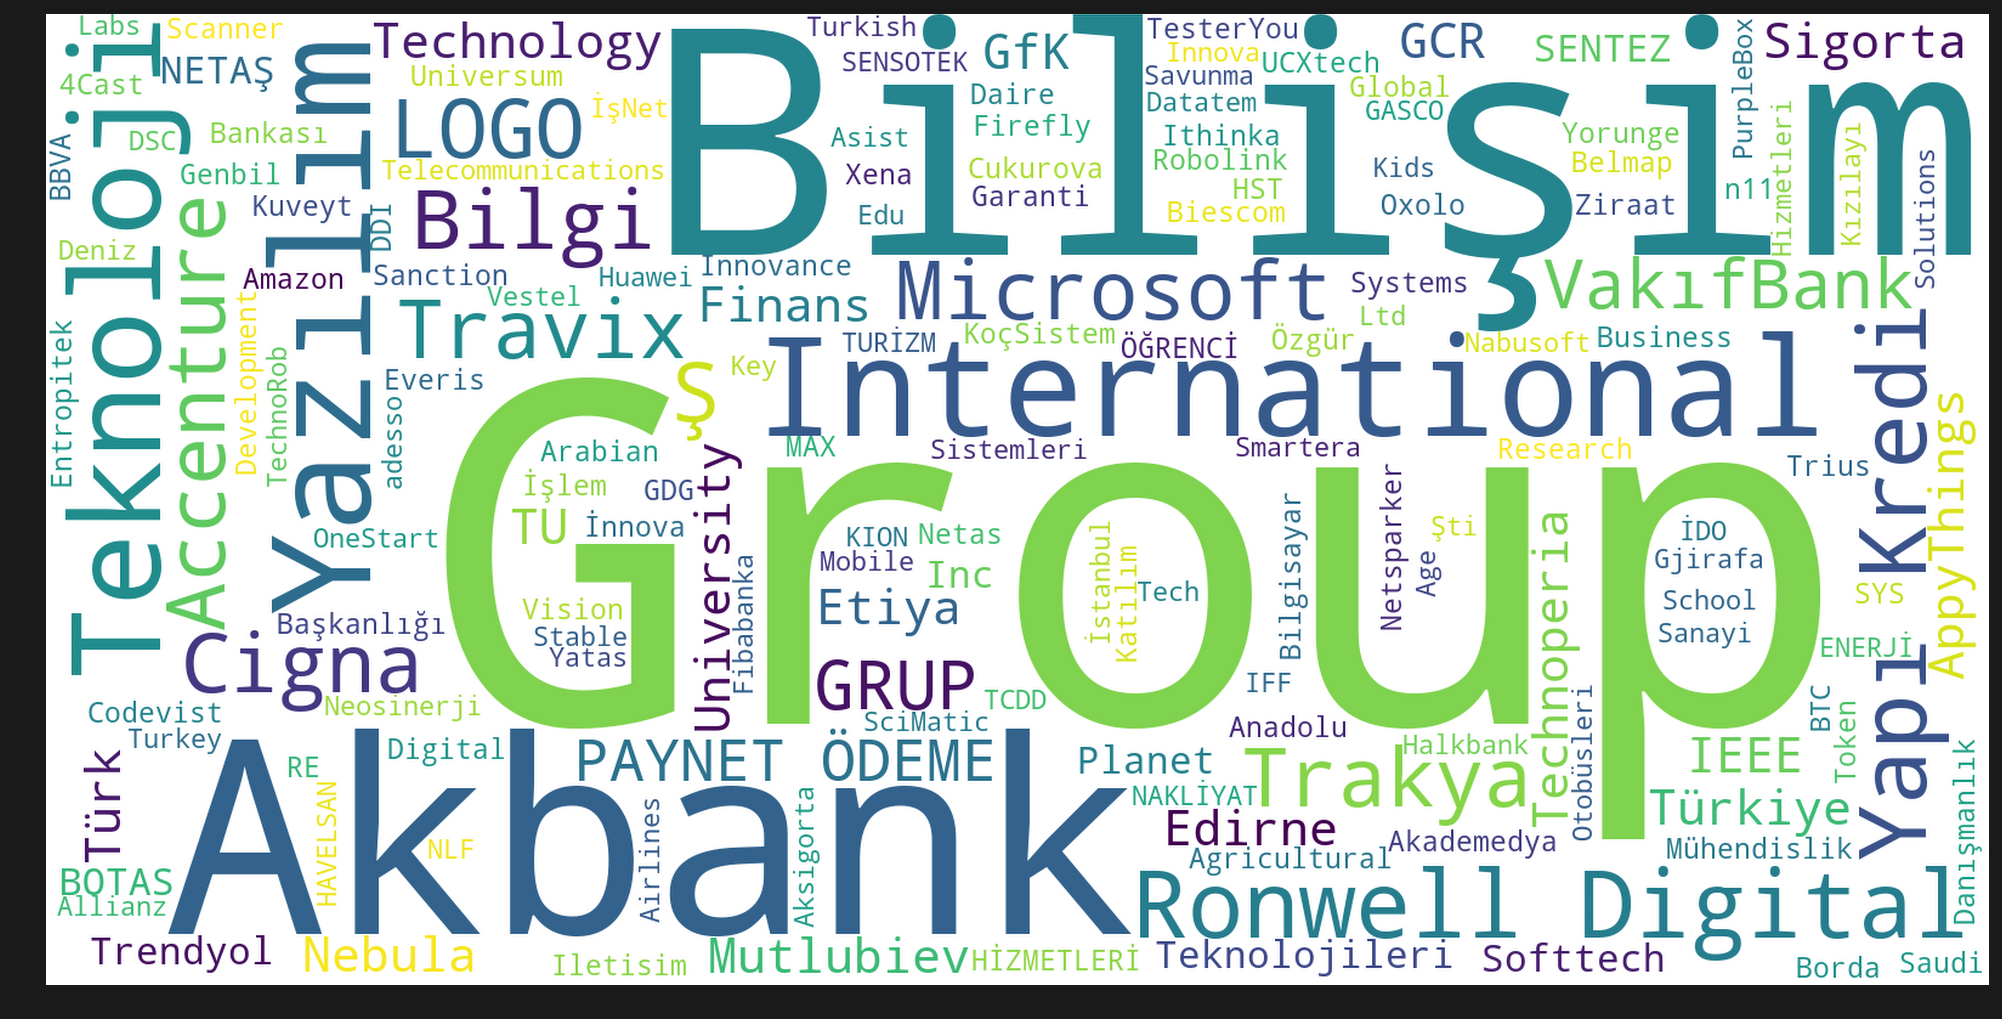

In [177]:
liste_company=df_mez.FIRMA
liste_company=liste_company.dropna()
liste_company=','.join(liste_company)

stopwords = set(STOPWORDS)
stopwords.update(["asd"])


text = liste_company
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords,background_color="white").generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='Lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## CALISILAN KONUM

In [181]:
liste_title=df_mez.UNVAN

liste_title=','.join(liste_title)
liste_title[:1000]


' Software Engineer , Software Developer  , Founder & CEO, Dr. Öğr. Üyesi, Founder & CEO, Software Developer, Trakya Üniversitesi , Computer Science Student , Istanbul, Turkey, Trakya University, Intern, Trakya Üniversitesi, Software Engineer, Trakya Üniversitesi, Trakya Üniversitesi, System and Network Specialist, İstanbul, Türkiye, Schweiz, Intern , Software Developer, Intern, Assist.Prof.Dr., Greater Dublin, Intern, Trakya University, Trakya Üniversitesi, Assistant Professor, Trakya Üniversitesi, Business Integration Services, Trakya Üniversitesi, Full Stack Developer, Trakya Üniversitesi, Microsoft Turkey Student Ambassador, Software Developer, Johnstown, Pennsylvania Area, Trakya University, Software Developer, Software Engineer, Trakya Üniversitesi, Trakya Üniversitesi, Founder, Student Representative Coordination Team, Software Developer, Computer Engineer, Trakya University, Trakya Üniversitesi, Edirne, Turkey, Machine Learning Engineer, Administrative Board Member, Software En

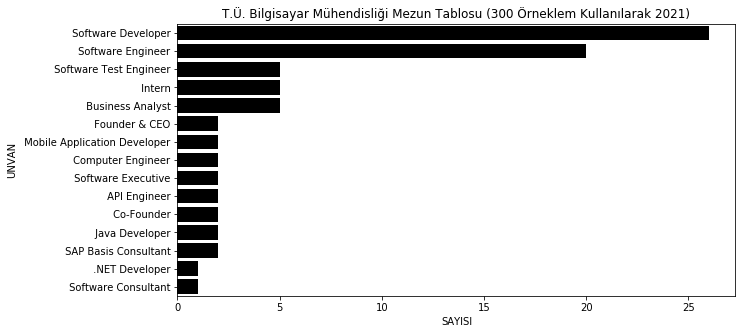

In [34]:
df_mez5=pd.DataFrame(df_mez[df_mez['FIRMA'].notnull()].filter(['UNVAN','FIRMA'])['UNVAN'].value_counts()[:15])
df_mez5=pd.DataFrame(df_mez5.reset_index())

#visualization
plt.figure(figsize=(10,5))
sns.barplot(x=df_mez5['UNVAN'], y=df_mez5['index'],color=('black'))
plt.xticks(rotation= 0)
plt.xlabel('SAYISI')
plt.ylabel("UNVAN")
plt.title('T.Ü. Bilgisayar Mühendisliği Mezun Tablosu (300 Örneklem Kullanılarak 2021)');

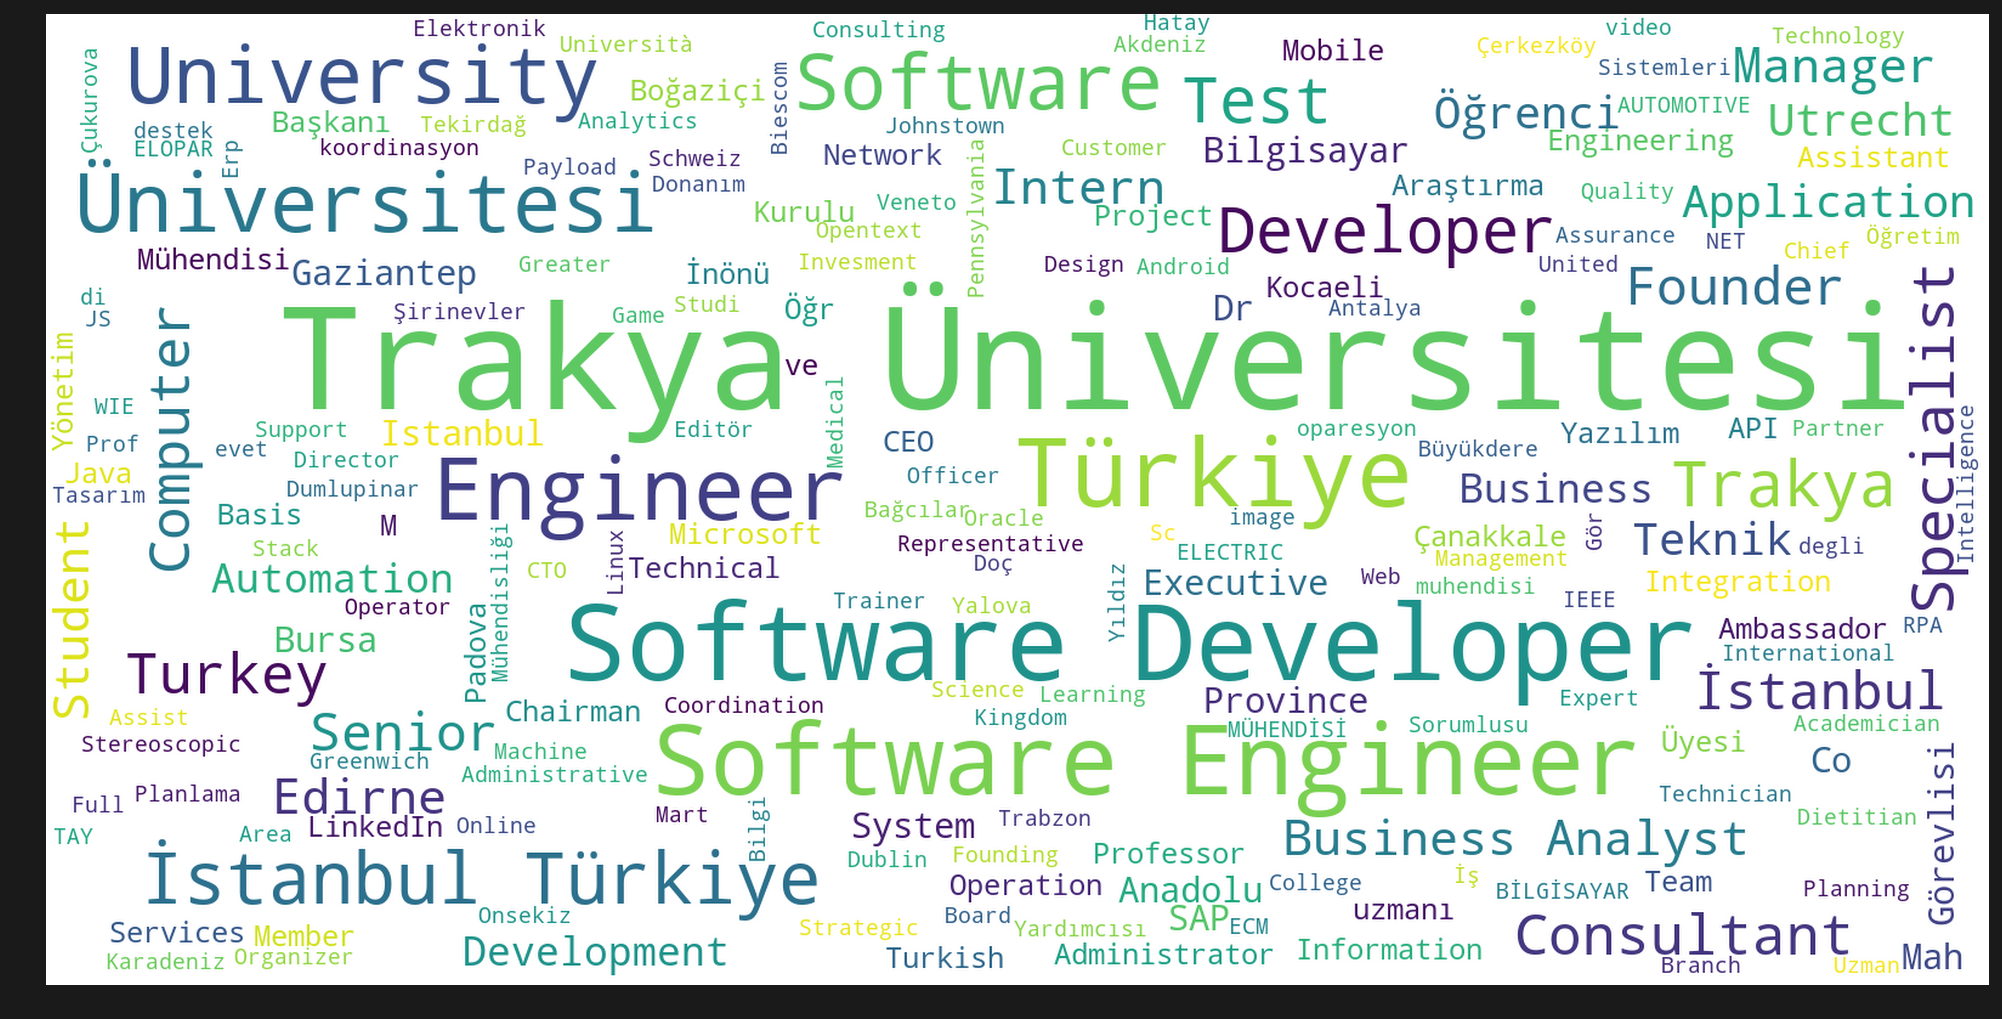

In [182]:
stopwords = set(STOPWORDS)
stopwords.update(["asd"])

text = liste_title
wordcloud = WordCloud(width=1600, height=800,stopwords=stopwords,background_color="white").generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud,interpolation='Lanczos')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<a id="7"></a> <br>
# SON


####  **AYDINLATMA1:** Genellenebilir yapılar oluşturma amacına uymayan bazı aykırı değerler(Pandemi) gerekçesiyle bazı 2021 yılı
#### verileri dahil edilmeyip 2020 yılına kadar olan analizler yapılmıştır.
#### **AYDINLATMA2:** Veriler aşağıda verilen kaynaklardan çekilerek herhangi bir yorum katılmadan direkt olarak işlenmiştir.
#### Raporu, veri kaynaklarında bulunan eksiklik veya yanlışık ihtimallerini göz önünde bulundurarak incelemenizi rica ediyoruz.
1. Ağırlıklı Veri Kaynakları:
    1. https://www.linkedin.com/school/trakya-university/people/
    1. https://muhendislik.trakya.edu.tr/
    1. https://obs.trakya.edu.tr/
    1. https://www.trakya.edu.tr/
    1. https://www.google.com.tr/

##### Hazırlayan:Berkay Cihan


